In [1]:
# Import the required toolkit

# Navigate to the project script directory
import os
os.chdir('/g/data/jk72/ck4840/projects/um_emc2/scripts')
# Check current project directory
print("Project directory:", os.getcwd())
# Import toolkit in project directory
import um_emc2_toolkit
print('Successfully imported all required packages')

Project directory: /g/data/jk72/ck4840/projects/um_emc2/scripts
Successfully imported all required packages


# File saving

In [8]:
from um_emc2_toolkit import datetime, xr

# Set inputs for um_emc2_main function

# Date
date = datetime(2018, 2, 4)
# date = '20180204'

# Parent folder
parent_folder = '/g/data/jk72/ck4840/projects/um_emc2/data/um_reg_input_files'
# parent_folder = '/g/data/jk72/slf563/cylc-run/u-db930/share/cycle/20180203T1200Z/Mawson/resn_1/RAL3p2/um/processed'

# Output folder
output_folder = '/g/data/jk72/ck4840/projects/um_emc2/data/output'

# Coordinates
# marcus_coordinates_20180201_20180207_basenames_1min.nc uses unaltered variable names that will be changed by um_emc2_input_validator to those found in marcus_coordinates_20180201_20180207_1min.nc
coordinates = xr.open_dataset('/g/data/jk72/ck4840/projects/um_emc2/data/marcus_coordinates/marcus_coordinates_20180201_20180207_basenames_1min.nc')
# coordinates = xr.open_dataset('/g/data/jk72/ck4840/projects/um_emc2/data/marcus_coordinates/marcus_coordinates_20180201_20180207_1min.nc')

In [5]:
# Execute um_emc2_main
um_emc2_toolkit.um_emc2_main(date = date, parent_folder = parent_folder, output_folder = output_folder, coordinates = coordinates)

30 .nc files found

um_emc2_input_validator executed successfully

000
umnsaa_pa000.nc
umnsaa_palcf000.nc
umnsaa_pcloud000.nc
umnsaa_pmixing000.nc
umnsaa_pradar000.nc
umnsaa_pvera000.nc
umnsaa_pverb000.nc
umnsaa_pverc000.nc
umnsaa_pverd000.nc
umnsaa_pwind000.nc
012
umnsaa_pa012.nc
umnsaa_palcf012.nc
umnsaa_pcloud012.nc
umnsaa_pmixing012.nc
umnsaa_pradar012.nc
umnsaa_pvera012.nc
umnsaa_pverb012.nc
umnsaa_pverc012.nc
umnsaa_pverd012.nc
umnsaa_pwind012.nc
024
umnsaa_pa024.nc
umnsaa_palcf024.nc
umnsaa_pcloud024.nc
umnsaa_pmixing024.nc
umnsaa_pradar024.nc
umnsaa_pvera024.nc
umnsaa_pverb024.nc
umnsaa_pverc024.nc
umnsaa_pverd024.nc
umnsaa_pwind024.nc

um_emc2_dictionary_sorter executed successfully

Now searching 000 files...
Now searching umnsaa_pa000.nc...
No index found for coordinate time - skipping current file...
Now searching umnsaa_palcf000.nc...
umnsaa_palcf000.nc in 000 block has no data inside current date - skipping current key...

Now searching 012 files...
Now searching umnsaa_p

# File plotting

Finished plotting


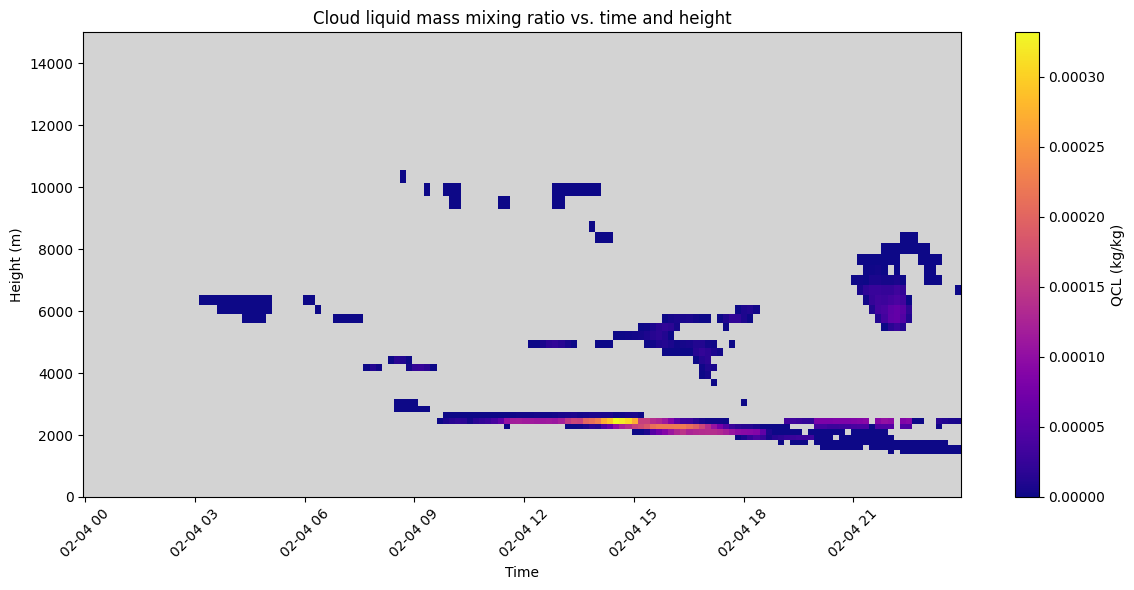

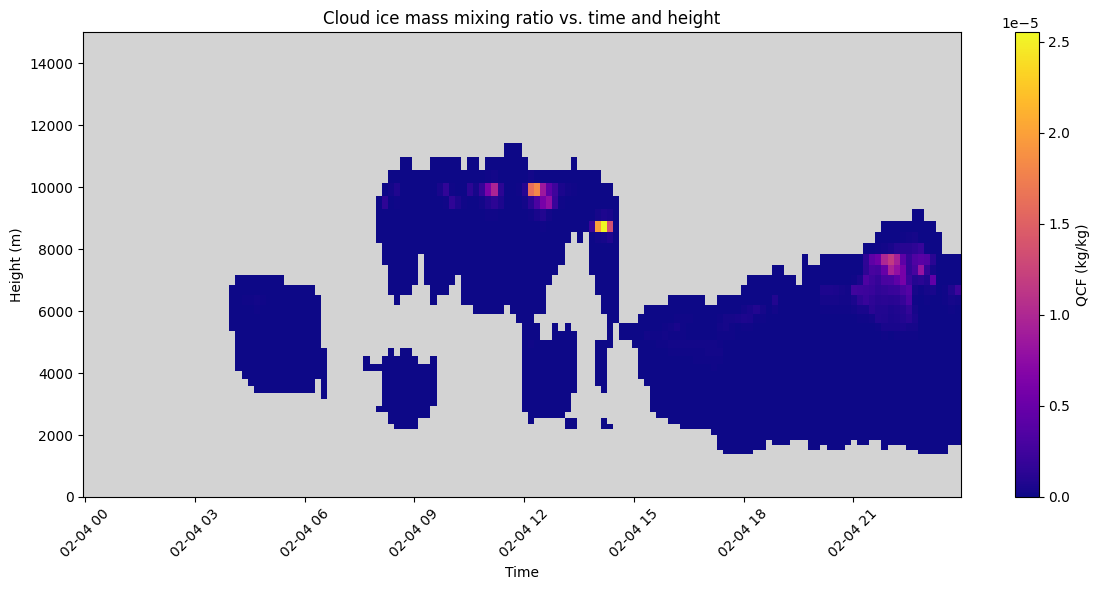

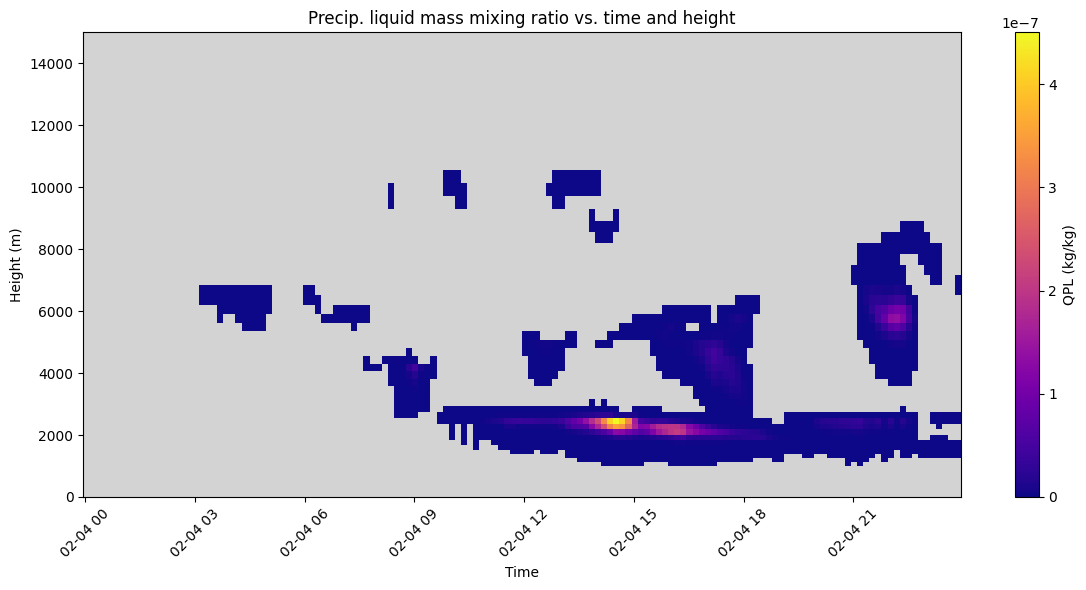

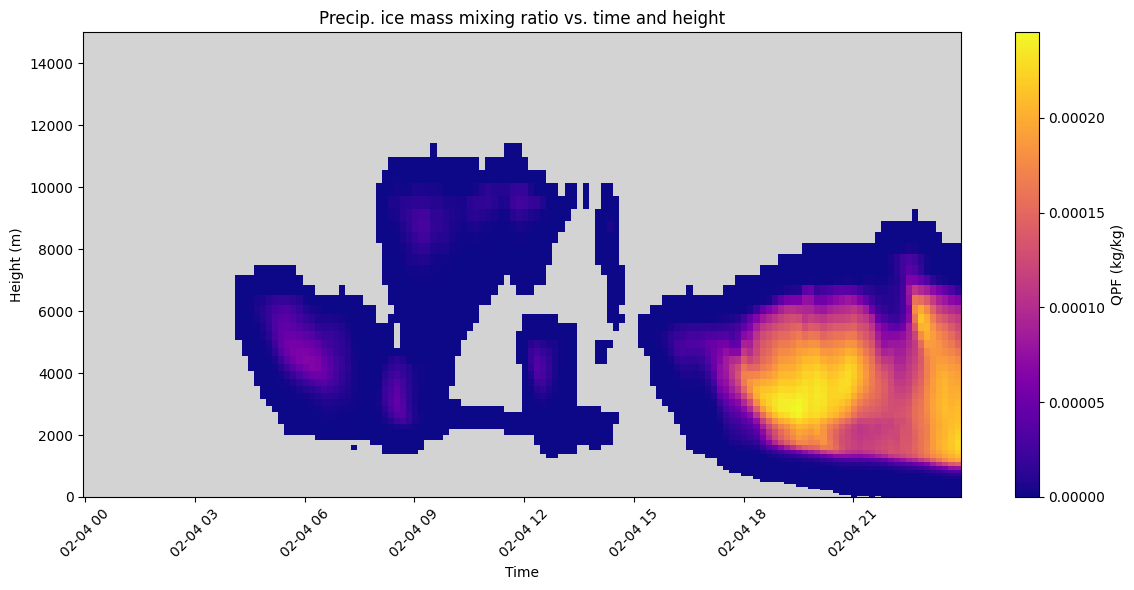

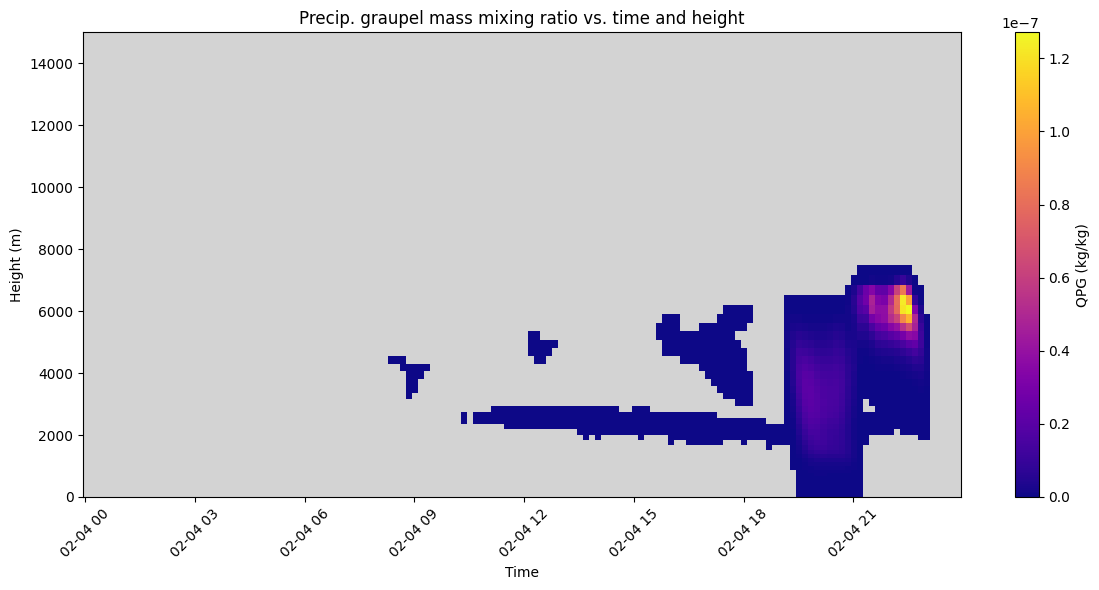

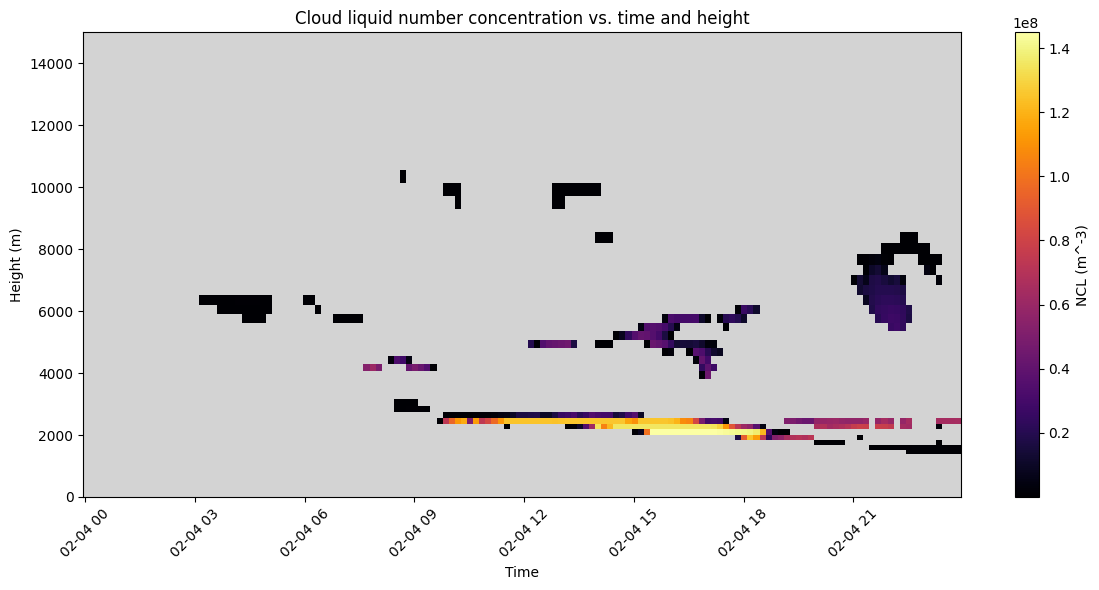

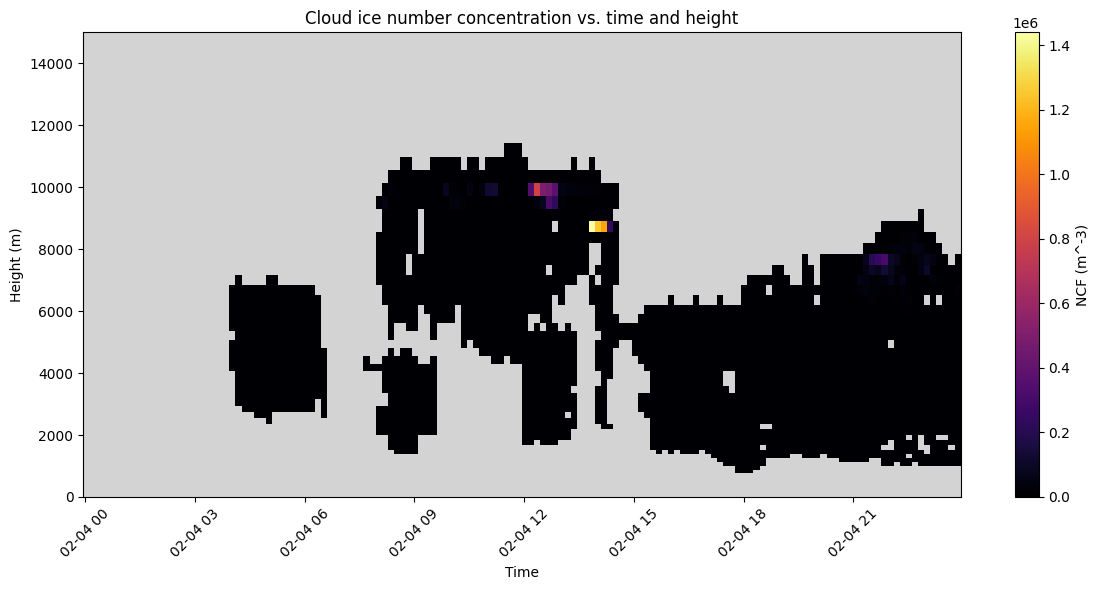

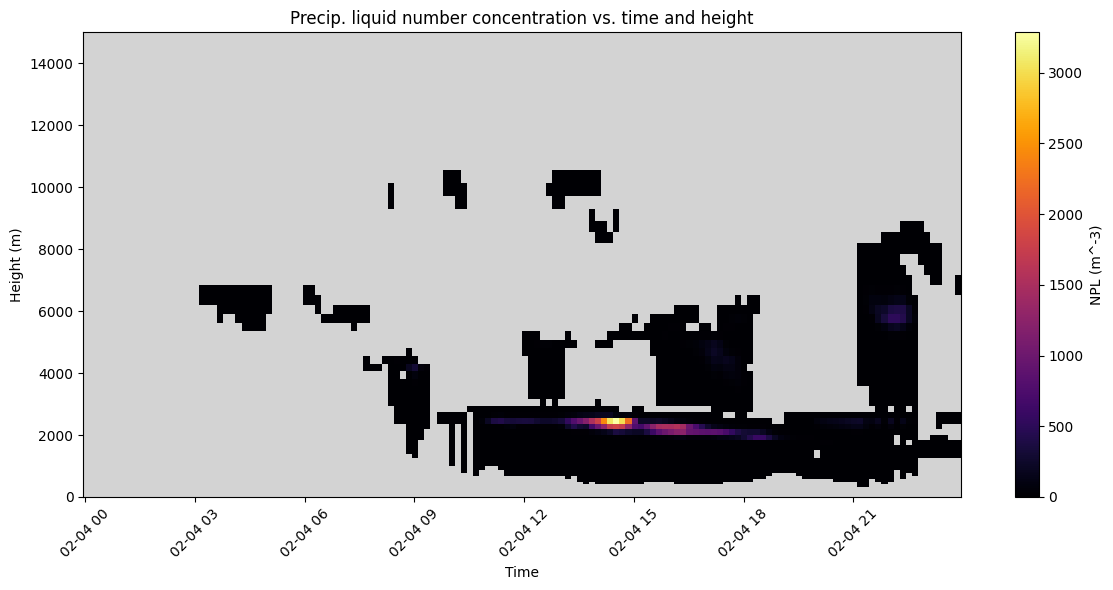

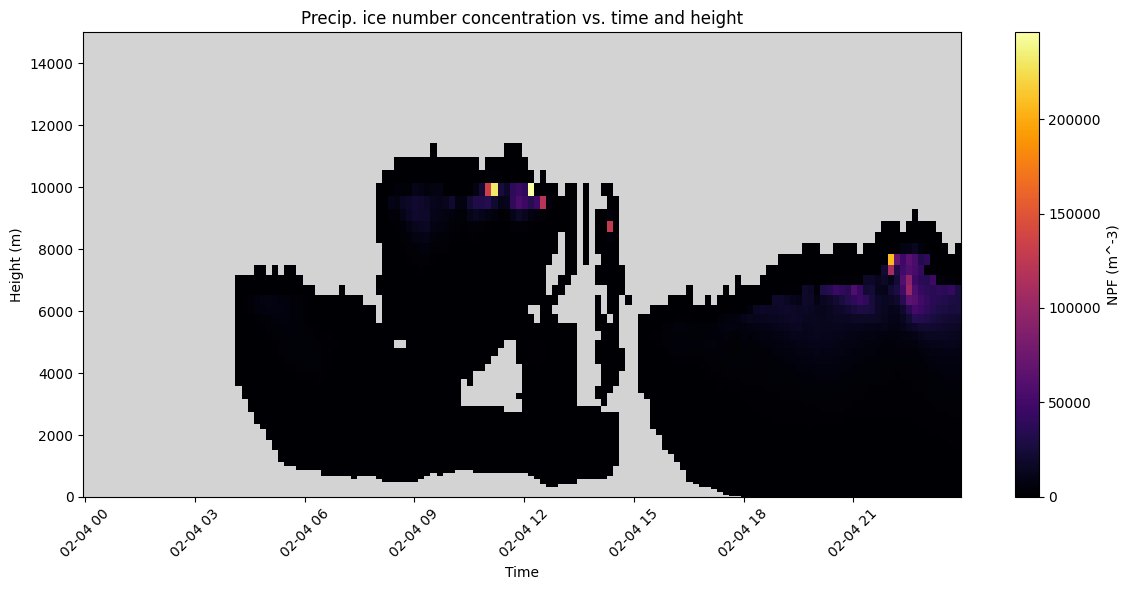

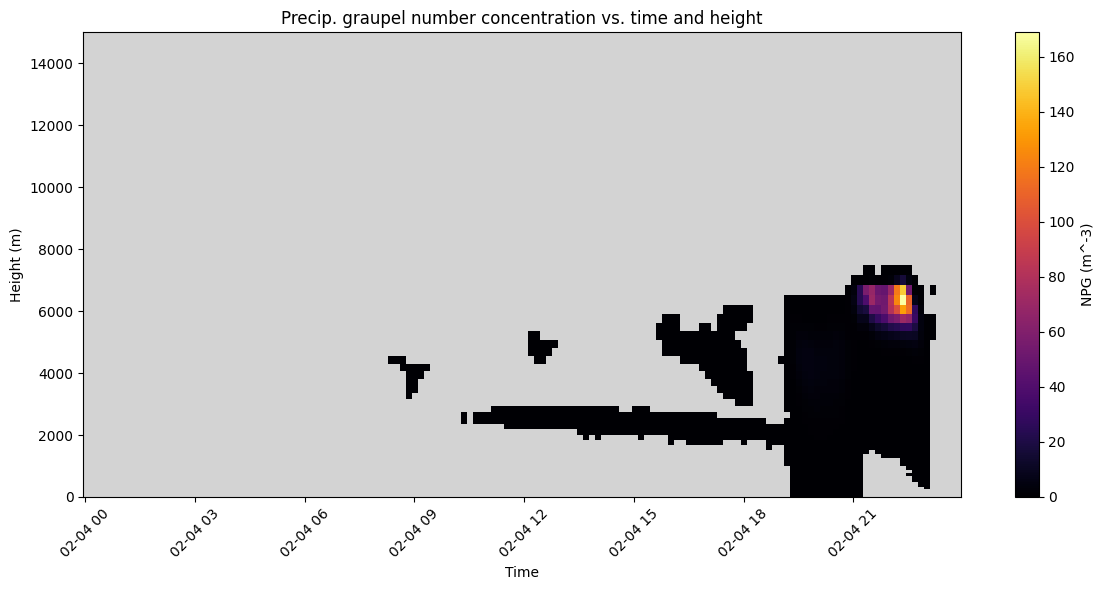

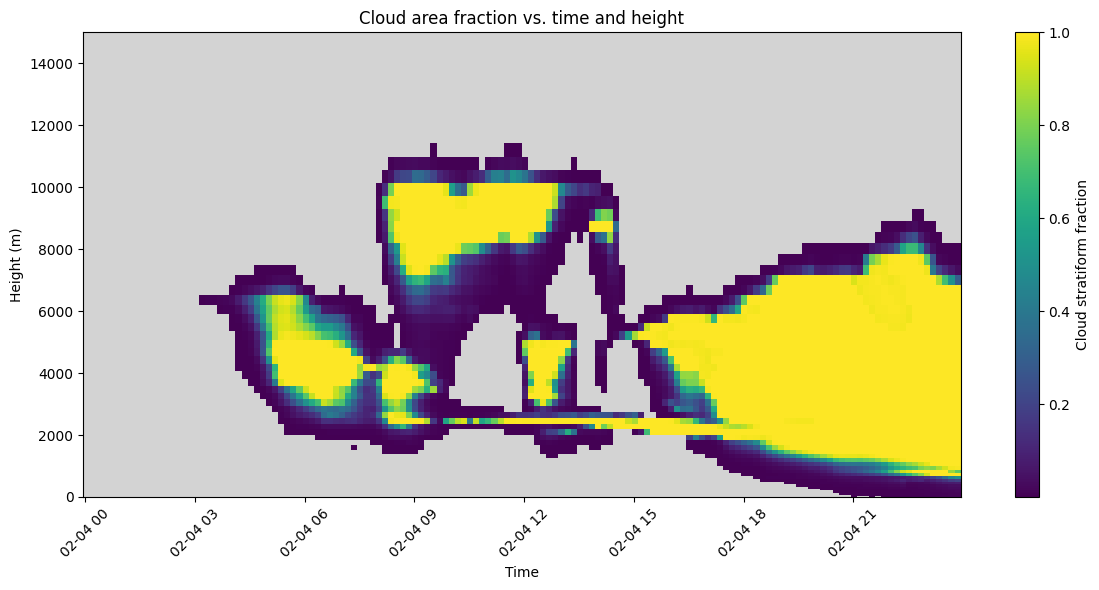

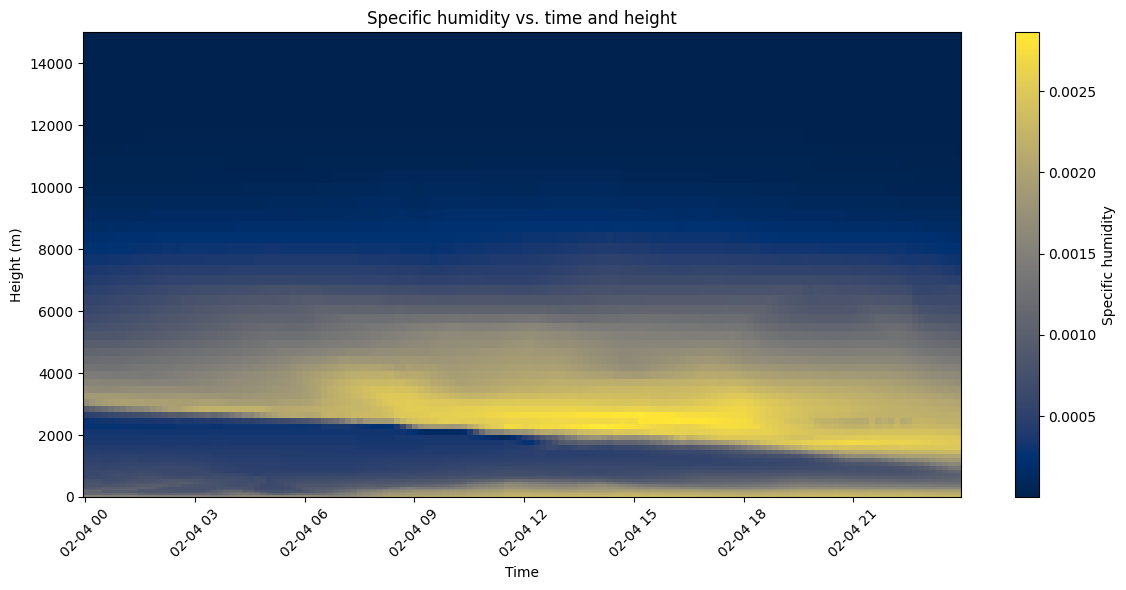

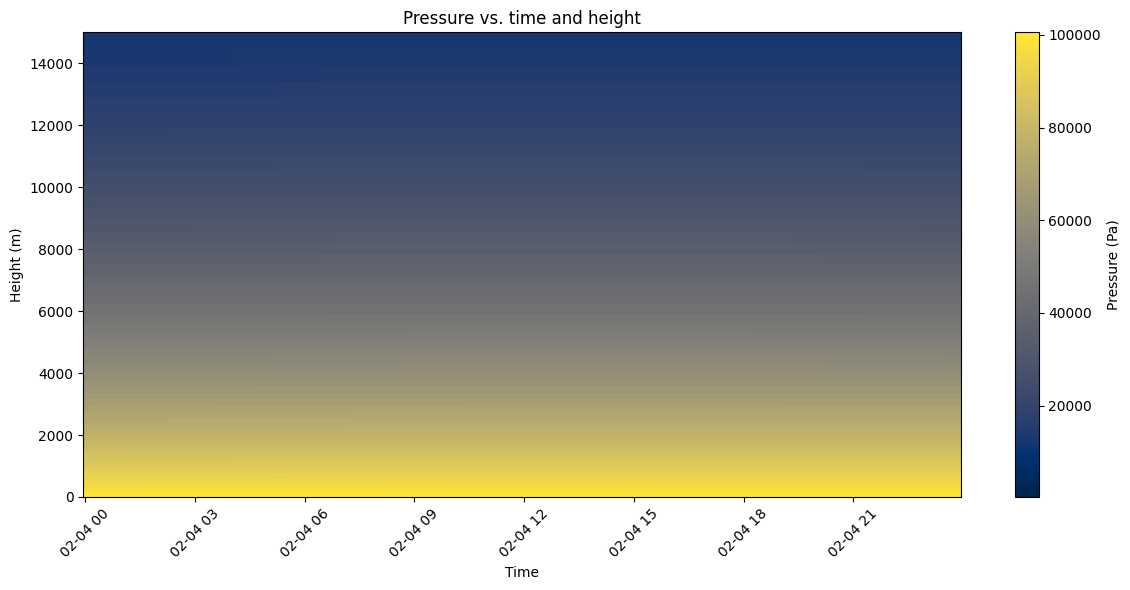

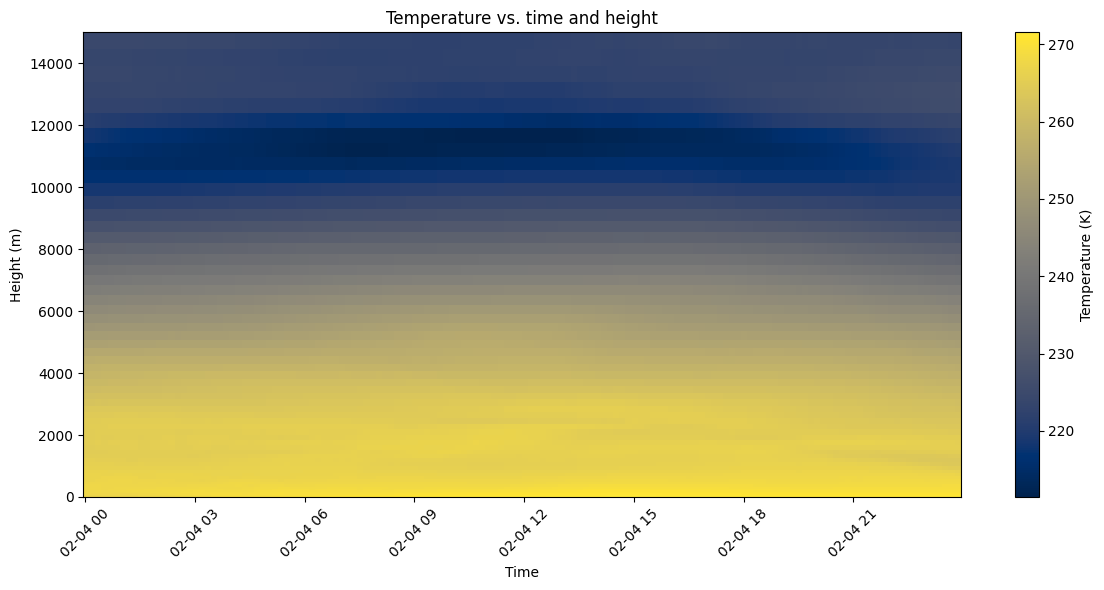

In [12]:
from um_emc2_toolkit import np, plt

# Create plots of atmospheric properties from the processed UM output

# Load the final dataset
final_dataset = xr.open_dataset('/g/data/jk72/ck4840/projects/um_emc2/data/output/um_emc2_20180204.nc')

# Create a meshgrid for time and height to be used for all plots produced from the current file
time_mesh, height_mesh = np.meshgrid(final_dataset['time'], final_dataset['level_height'])

# Set the height limit for the plots
ylim_max = 15000

# QCL
# Extract the desired variable
QCL = final_dataset['mass_fraction_of_cloud_liquid_water_in_air']
# Set QCL values equal to 0 to grey
QCL_grey = np.where(QCL == 0, np.nan, QCL)
# Create the plot with a grey background
plt.figure(figsize = (12, 6))
plt.gca().set_facecolor('lightgrey')
# Create and organise a pcolormesh plot
pcm = plt.pcolormesh(time_mesh, height_mesh, QCL_grey.T, cmap = 'plasma', shading = 'auto')
plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.colorbar(pcm, label = 'QCL (kg/kg)')
plt.title('Cloud liquid mass mixing ratio vs. time and height')
plt.ylim(0, ylim_max)
plt.xticks(rotation = 45)
plt.tight_layout()
daily_UM_reg_QCL = plt.gcf()

# QCF
# Extract the desired variable
QCF = final_dataset['mass_fraction_of_cloud_ice_crystals_in_air']
# Set QCF values equal to 0 to grey
QCF_grey = np.where(QCF == 0, np.nan, QCF)
# Create the plot with a grey background
plt.figure(figsize = (12, 6))
plt.gca().set_facecolor('lightgrey')
# Create and organise a pcolormesh plot
pcm = plt.pcolormesh(time_mesh, height_mesh, QCF_grey.T, cmap = 'plasma', shading = 'auto')
plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.colorbar(pcm, label = 'QCF (kg/kg)')
plt.title('Cloud ice mass mixing ratio vs. time and height')
plt.ylim(0, ylim_max)
plt.xticks(rotation = 45)
plt.tight_layout()
daily_UM_reg_QCF = plt.gcf()

# QPL
# Extract the desired variable
QPL = final_dataset['mass_fraction_of_rain_in_air']
# Set QPL values equal to 0 to grey
QPL_grey = np.where(QPL == 0, np.nan, QPL)
# Create the plot with a grey background
plt.figure(figsize = (12, 6))
plt.gca().set_facecolor('lightgrey')
# Create and organise a pcolormesh plot
pcm = plt.pcolormesh(time_mesh, height_mesh, QPL_grey.T, cmap = 'plasma', shading = 'auto')
plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.colorbar(pcm, label = 'QPL (kg/kg)')
plt.title('Precip. liquid mass mixing ratio vs. time and height')
plt.ylim(0, ylim_max)
plt.xticks(rotation = 45)
plt.tight_layout()
daily_UM_reg_QPL = plt.gcf()

# QPF
# Extract the desired variable
QPF = final_dataset['mass_fraction_of_cloud_ice_in_air']
# Set QPF values equal to 0 to grey
QPF_grey = np.where(QPF == 0, np.nan, QPF)
# Create the plot with a grey background
plt.figure(figsize = (12, 6))
plt.gca().set_facecolor('lightgrey')
# Create and organise a pcolormesh plot
pcm = plt.pcolormesh(time_mesh, height_mesh, QPF_grey.T, cmap = 'plasma', shading = 'auto')
plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.colorbar(pcm, label = 'QPF (kg/kg)')
plt.title('Precip. ice mass mixing ratio vs. time and height')
plt.ylim(0, ylim_max)
plt.xticks(rotation = 45)
plt.tight_layout()
daily_UM_reg_QPF = plt.gcf()

# QPG
# Extract the desired variable
QPG = final_dataset['mass_fraction_of_graupel_in_air']
# Set QPG values equal to 0 to grey
QPG_grey = np.where(QPG == 0, np.nan, QPG)
# Create the plot with a grey background
plt.figure(figsize = (12, 6))
plt.gca().set_facecolor('lightgrey')
# Create and organise a pcolormesh plot
pcm = plt.pcolormesh(time_mesh, height_mesh, QPG_grey.T, cmap = 'plasma', shading = 'auto')
plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.colorbar(pcm, label = 'QPG (kg/kg)')
plt.title('Precip. graupel mass mixing ratio vs. time and height')
plt.ylim(0, ylim_max)
plt.xticks(rotation = 45)
plt.tight_layout()
daily_UM_reg_QPG = plt.gcf()

# NCL
# Extract the desired variable
NCL = final_dataset['number_of_cloud_droplets_per_kg_of_air']
# Set NCL values equal to 0 to grey
NCL_grey = np.where(NCL == 0, np.nan, NCL)
# Create the plot with a grey background
plt.figure(figsize = (12, 6))
plt.gca().set_facecolor('lightgrey')
# Create and organise a pcolormesh plot
pcm = plt.pcolormesh(time_mesh, height_mesh, NCL_grey.T, cmap = 'inferno', shading = 'auto')
plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.colorbar(pcm, label = 'NCL (m^-3)')
plt.title('Cloud liquid number concentration vs. time and height')
plt.ylim(0, ylim_max)
plt.xticks(rotation = 45)
plt.tight_layout()
daily_UM_reg_NCL = plt.gcf()

# NCF
# Extract the desired variable
NCF = final_dataset['number_of_ice_particles_per_kg_of_air']
# Set NCF values equal to 0 to grey
NCF_grey = np.where(NCF == 0, np.nan, NCF)
# Create the plot with a grey background
plt.figure(figsize = (12, 6))
plt.gca().set_facecolor('lightgrey')
# Create and organise a pcolormesh plot
pcm = plt.pcolormesh(time_mesh, height_mesh, NCF_grey.T, cmap = 'inferno', shading = 'auto')
plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.colorbar(pcm, label = 'NCF (m^-3)')
plt.title('Cloud ice number concentration vs. time and height')
plt.ylim(0, ylim_max)
plt.xticks(rotation = 45)
plt.tight_layout()
daily_UM_reg_NCF = plt.gcf()

# NPL
# Extract the desired variable
NPL = final_dataset['number_of_rain_drops_per_kg_of_air']
# Set NPL values equal to 0 to grey
NPL_grey = np.where(NPL == 0, np.nan, NPL)
# Create the plot with a grey background
plt.figure(figsize = (12, 6))
plt.gca().set_facecolor('lightgrey')
# Create and organise a pcolormesh plot
pcm = plt.pcolormesh(time_mesh, height_mesh, NPL_grey.T, cmap = 'inferno', shading = 'auto')
plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.colorbar(pcm, label = 'NPL (m^-3)')
plt.title('Precip. liquid number concentration vs. time and height')
plt.ylim(0, ylim_max)
plt.xticks(rotation = 45)
plt.tight_layout()
daily_UM_reg_NPL = plt.gcf()

# NPF
# Extract the desired variable
NPF = final_dataset['number_of_snow_aggregates_per_kg_of_air']
# Set NPF values equal to 0 to grey
NPF_grey = np.where(NPF == 0, np.nan, NPF)
# Create the plot with a grey background
plt.figure(figsize = (12, 6))
plt.gca().set_facecolor('lightgrey')
# Create and organise a pcolormesh plot
pcm = plt.pcolormesh(time_mesh, height_mesh, NPF_grey.T, cmap = 'inferno', shading = 'auto')
plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.colorbar(pcm, label = 'NPF (m^-3)')
plt.title('Precip. ice number concentration vs. time and height')
plt.ylim(0, ylim_max)
plt.xticks(rotation = 45)
plt.tight_layout()
daily_UM_reg_NPF = plt.gcf()

# NPG
# Extract the desired variable
NPG = final_dataset['number_of_graupel_particles_per_kg_of_air']
# Set NPG values equal to 0 to grey
NPG_grey = np.where(NPG == 0, np.nan, NPG)
# Create the plot with a grey background
plt.figure(figsize = (12, 6))
plt.gca().set_facecolor('lightgrey')
# Create and organise a pcolormesh plot
pcm = plt.pcolormesh(time_mesh, height_mesh, NPG_grey.T, cmap = 'inferno', shading = 'auto')
plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.colorbar(pcm, label = 'NPG (m^-3)')
plt.title('Precip. graupel number concentration vs. time and height')
plt.ylim(0, ylim_max)
plt.xticks(rotation = 45)
plt.tight_layout()
daily_UM_reg_NPG = plt.gcf()

# Cloud stratiform fraction
# Extract the desired variable
strat_frac = final_dataset['cloud_area_fraction_in_atmosphere_layer']
# Set strat_frac values equal to 0 to grey
strat_frac_grey = np.where(strat_frac == 0, np.nan, strat_frac)
# Create the plot with a grey background
plt.figure(figsize = (12, 6))
plt.gca().set_facecolor('lightgrey')
# Create and organise a pcolormesh plot
pcm = plt.pcolormesh(time_mesh, height_mesh, strat_frac_grey.T, cmap = 'viridis', shading = 'auto')
plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.colorbar(pcm, label = 'Cloud stratiform fraction')
plt.title('Cloud area fraction vs. time and height')
plt.ylim(0, ylim_max)
plt.xticks(rotation = 45)
plt.tight_layout()
daily_UM_reg_strat_frac = plt.gcf()

# Specific humidity
# Extract the desired variable
hus = final_dataset['specific_humidity']
# Create the plot with a grey background
plt.figure(figsize = (12, 6))
plt.gca().set_facecolor('lightgrey')
# Create and organise a pcolormesh plot
pcm = plt.pcolormesh(time_mesh, height_mesh, hus.T, cmap = 'cividis', shading = 'auto')
plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.colorbar(pcm, label = 'Specific humidity')
plt.title('Specific humidity vs. time and height')
plt.ylim(0, ylim_max)
plt.xticks(rotation = 45)
plt.tight_layout()
daily_UM_reg_hus = plt.gcf()

# Pressure
# Extract the desired variable
pressure = final_dataset['air_pressure']
# Create the plot with a grey background
plt.figure(figsize = (12, 6))
plt.gca().set_facecolor('lightgrey')
# Create and organise a pcolormesh plot
pcm = plt.pcolormesh(time_mesh, height_mesh, pressure.T, cmap = 'cividis', shading = 'auto')
plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.colorbar(pcm, label = 'Pressure (Pa)')
plt.title('Pressure vs. time and height')
plt.ylim(0, ylim_max)
plt.xticks(rotation = 45)
plt.tight_layout()
daily_UM_reg_pressure = plt.gcf()

# Temperature
# Extract the desired variable
temperature = final_dataset['air_temperature']
# Create the plot with a grey background
plt.figure(figsize = (12, 6))
plt.gca().set_facecolor('lightgrey')
# Create and organise a pcolormesh plot
pcm = plt.pcolormesh(time_mesh, height_mesh, temperature.T, cmap = 'cividis', shading = 'auto')
plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.colorbar(pcm, label = 'Temperature (K)')
plt.title('Temperature vs. time and height')
plt.ylim(0, ylim_max)
plt.xticks(rotation = 45)
plt.tight_layout()
daily_UM_reg_temperature = plt.gcf()

print('Finished plotting')